In [83]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.parsing_utils import *
from utils.utils import *
from scripts.parse_results import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
#RES_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/bitmap_new"
#RES_DIR2 = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results4"

# RES_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results4"
# RES_DIR4 = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results_new_seeds"
# RES_DIR2 = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/priority"

#RES_DIR3 = "/home/pari/learned-cardinalities/all_results/xgboost/test_diff/"
#RES_DIR = "/home/pari/learned-cardinalities/all_results/xgb/default_config"

## default
RES_DIR = "/home/pari/learned-cardinalities/all_results/vldb/default/hyp_sweep2/"

#RES_DIR3 = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results_new_seeds/"
#RES_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results_new_seeds_wd1"


RES_DIRS = []
RES_DIRS.append(RES_DIR)
#RES_DIRS.append(RES_DIR2)
#RES_DIRS.append(RES_DIR3)
#RES_DIRS.append(RES_DIR4)

OVERLAP_INFO = "./all_results/3/overlap_info.pkl"

dfs = []
qerr_all = []
for res_dir in RES_DIRS:
    print(res_dir)
    df = get_summary_df(res_dir)
#     qerr = get_all_objects(res_dir, "all_qerr.pkl")
#     qerr_all.append(qerr)
    
    df["res_dir"] = str(deterministic_hash(res_dir))[0:5]
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
#qerrs = pd.concat(qerr_all, ignore_index=True)

/home/pari/learned-cardinalities/all_results/vldb/default/hyp_sweep2/
/home/pari/learned-cardinalities/all_results/vldb/default/hyp_sweep2//default-nested_loop_index7-NN-df:10-nn:2:256-loss:mse-0.0--D0.1-352
1
*********
/home/pari/learned-cardinalities/all_results/vldb/default/hyp_sweep2//default-nested_loop_index7-NN-df:10-nn:2:256-loss:mse-0.0--D0.1-212
1
*********
skipping  /home/pari/learned-cardinalities/all_results/vldb/default/hyp_sweep2//default-nested_loop_index7-NN-df:10-nn:2:256-loss:mse-0.0--D0.1-212
/home/pari/learned-cardinalities/all_results/vldb/default/hyp_sweep2//default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D1.0-278
1
*********
/home/pari/learned-cardinalities/all_results/vldb/default/hyp_sweep2//default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D0.1-997
1
*********
/home/pari/learned-cardinalities/all_results/vldb/default/hyp_sweep2//default-nested_loop_index7-NN-df:10-nn:2:256-loss:mse-0.0--D1.0-123
1
*********
skipping  /home/pari/learned-car

In [85]:
df = df[df["alg_name"] != "true"]
df = df[df["alg_name"] != "postgres"]
#df = df[df["weight_decay"] == 0.1]

print(set(df["alg_name"]))
print(set(df["nn_type"]))
print(set(df["flow_features"]))
print(set(df["sample_bitmap"]))
print(set(df["feat_rel_pg_ests_onehot"]))
print(set(df["hidden_layer_size"]))
print(set(df["test_size"]))
print(set(df["weight_decay"]))
print(set(df["max_epochs"]))
print(set(df["fn"]))

{'mse', 'flow_loss2'}
{'mscn_set'}
{1}
{0}
{0, 1}
{256, 128}
{0.5}
{0.1, 1.0}
{10, 20}
{'default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D0.1-507', 'default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D1.0-441', 'default-nested_loop_index7-NN-df:10-nn:2:128-loss:flow_loss2-0.0--D0.1-917', 'default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D1.0-851', 'default-nested_loop_index7-NN-df:10-nn:2:256-loss:mse-0.0--D0.1-326', 'default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D0.1-997', 'default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D1.0-177', 'default-nested_loop_index7-NN-df:10-nn:2:256-loss:mse-0.0--D0.1-352', 'default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D0.1-133', 'default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D1.0-278', 'default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D1.0-110', 'default-nested_loop_index7-NN-df:10-nn:2:128-loss:mse-0.0--D1.0-139'}


In [86]:
df["loss"] = abs(df["loss"])

In [87]:
#ERRORS = ["qerr", "plan_pg_err", "jerr", "cm1_jerr"]
ERRORS = ["qerr", "flow_err", "plan_err", "jerr", "cm1_jerr"]

COLORS = ["blue", "green", "orange", "red", "black", "violet", "lightblue", "gray"]
#MSE_COLOR = "blue"

#cols = ["alg_name", "hidden_layer_size", "num_hidden_layers", "sample_bitmap"]
#cols = ["alg_name", "flow_features"]

cols = ["alg_name", "sampling_priority_alpha", "weight_decay"]
#cols = ["alg_name", "fn_hash"]
df['alg_name'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#df.loc[df['alg_name'] == "flow_loss2_0_1", ["alg_name"]] = "flow_loss2_0_0"

all_df = df[df["template"] != "all"]
df = df[df["template"] == "all"]
df = df[df["summary_type"] == "mean"]
#df = df[df["num_tables"] == "all"]
df = df[df.debug_set == 0]

print("additional default filters")

df = df[df.test_size == 0.5]

print("not restricting to 10 buckets")
#df = df[df.max_discrete_featurizing_buckets == 10]
#df = df[df.hidden_layer_size == 256]


#df = df[df["flow_features"] == 1]
#ORDER = ["mse", "flow_loss2"]

ORDER = []
HUE_COLORS = {}
#HUE_COLORS = None

algs = list(set(df["alg_name"]))
algs.sort()
for i,alg in enumerate(algs):
    HUE_COLORS[alg] = COLORS[i]
    ORDER.append(alg)

    #if "mse" in alg:
    #    HUE_COLORS[alg] = MSE_COLOR
    #else:
    #    HUE_COLORS[alg] = COLORS[i]


additional default filters
not restricting to 10 buckets


In [88]:
print(set(df["loss_type"]))
print(set(df["max_epochs"]))
print(set(df["alg_name"]))
print(set(df["debug_set"]))
print(set(df["flow_features"]))
print(set(df["lr"]))
print(set(df["feat_rel_pg_ests"]))
print(set(df["use_set_padding"]))

{'cm1_jerr', 'jerr', 'qerr', 'plan_err'}
{10, 20}
{'flow_loss2_0.0_0.1', 'mse_0.0_1.0', 'mse_0.0_0.1'}
{0}
{1}
{0.0001, 0.001}
{0, 1}
{1, 3}


In [93]:
pd.set_option('display.max_rows', 500)
#cur_df = df[df.samples_type == "test"]
cur_df = df
#cur_df = cur_df[cur_df.loss_type == "cm1_jerr"]
cur_df = cur_df[cur_df.loss_type.isin(["cm1_jerr", "qerr"])]
cur_df.groupby(["partition", "max_epochs", "weight_decay", "hidden_layer_size", 
                "normalize_flow_loss", "feat_rel_pg_ests_onehot", "lr",
                "loss_type", "samples_type"]).describe()["loss"]

count  \
partition max_epochs weight_decay hidden_layer_size normalize_flow_loss feat_rel_pg_ests_onehot lr     loss_type samples_type          
0         10         0.1          128               1                   0                       0.0001 cm1_jerr  test            1.0   
                                                                                                                 train           1.0   
                                                                                                                 validation      1.0   
                                                                                                       qerr      test            1.0   
                                                                                                                 train           1.0   
                                                                                                                 validation      1.0   
                                                                                                0.0010 cm1_jerr  test            1.0   
                                                                                                                 train           1.0   
                                                                                                                 validation      1.0   
                                                                                                       qerr      test            1.0   
                                                                                                                 train           1.0   
                                                                                                                 validation      1.0   
                                                                        1                       0.0001 cm1_jerr  train           1.0   
                                                                                                       qerr      train           1.0   
                                  256               1                   0                       0.0010 cm1_jerr  test            1.0   
                                                                                                                 train           1.0   
                                                                                                                 validation      1.0   
                                                                                                       qerr      test            1.0   
                                                                                                                 train           1.0   
                                                                                                                 validation      1.0   
                     1.0          128               1                   0                       0.0001 cm1_jerr  test            1.0   
                                                                                                                 train           1.0   
                                                                                                                 validation      1.0   
                                                                                                       qerr      test            1.0   
                                                                                                                 train           1.0   
                                                                                                                 validation      1.0   
                                                                                                0.0010 cm1_jerr  test            1.0   
                                                                                                                 train           1.0   
                                               

In [80]:
cur_df = cur_df[cur_df.hidden_layer_size == 128]
cur_df = cur_df[cur_df.feat_rel_pg_ests_onehot == 0]
cur_df = cur_df[cur_df.weight_decay == 1.0]
print(set(cur_df["fn"]))

{'default-nested_loop_index7-NN-df:10-nn:2:128-loss:flow_loss2-0.0--D1.0-119'}


In [12]:
qerrs["loss"] = abs(qerrs["loss"])

NameError: name 'qerrs' is not defined

In [13]:
qerrs.groupby(["hidden_layer_size", "max_discrete_featurizing_buckets", "samples_type", 
             "alg_name"]).describe()["loss"]

NameError: name 'qerrs' is not defined

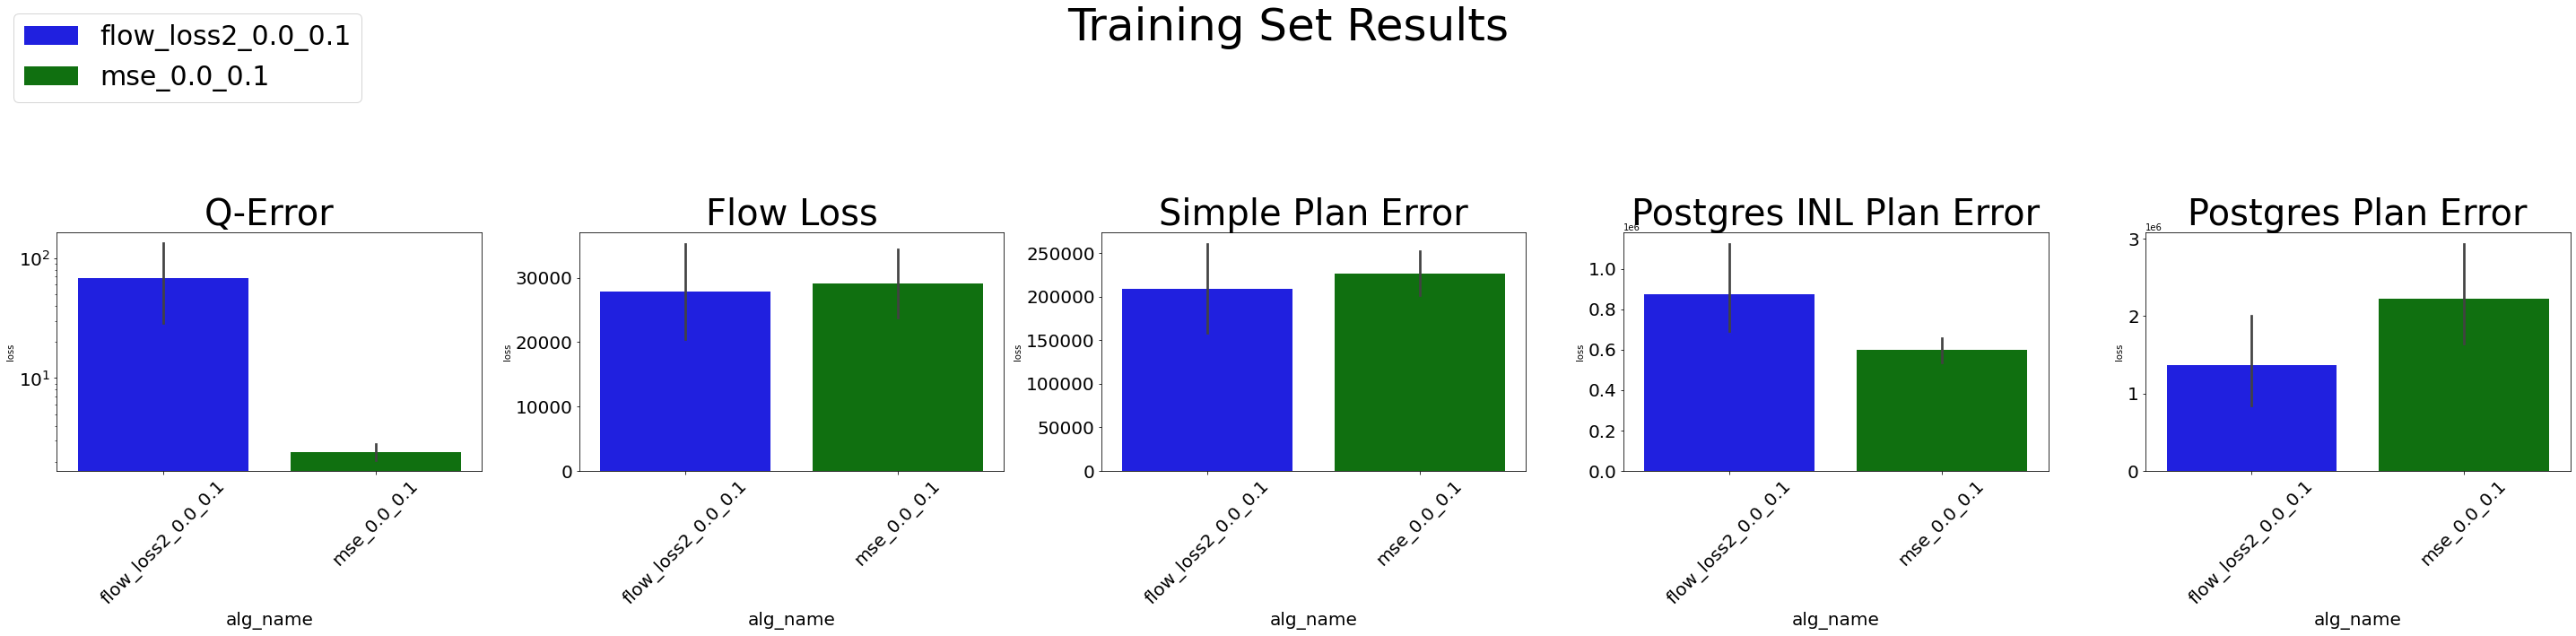

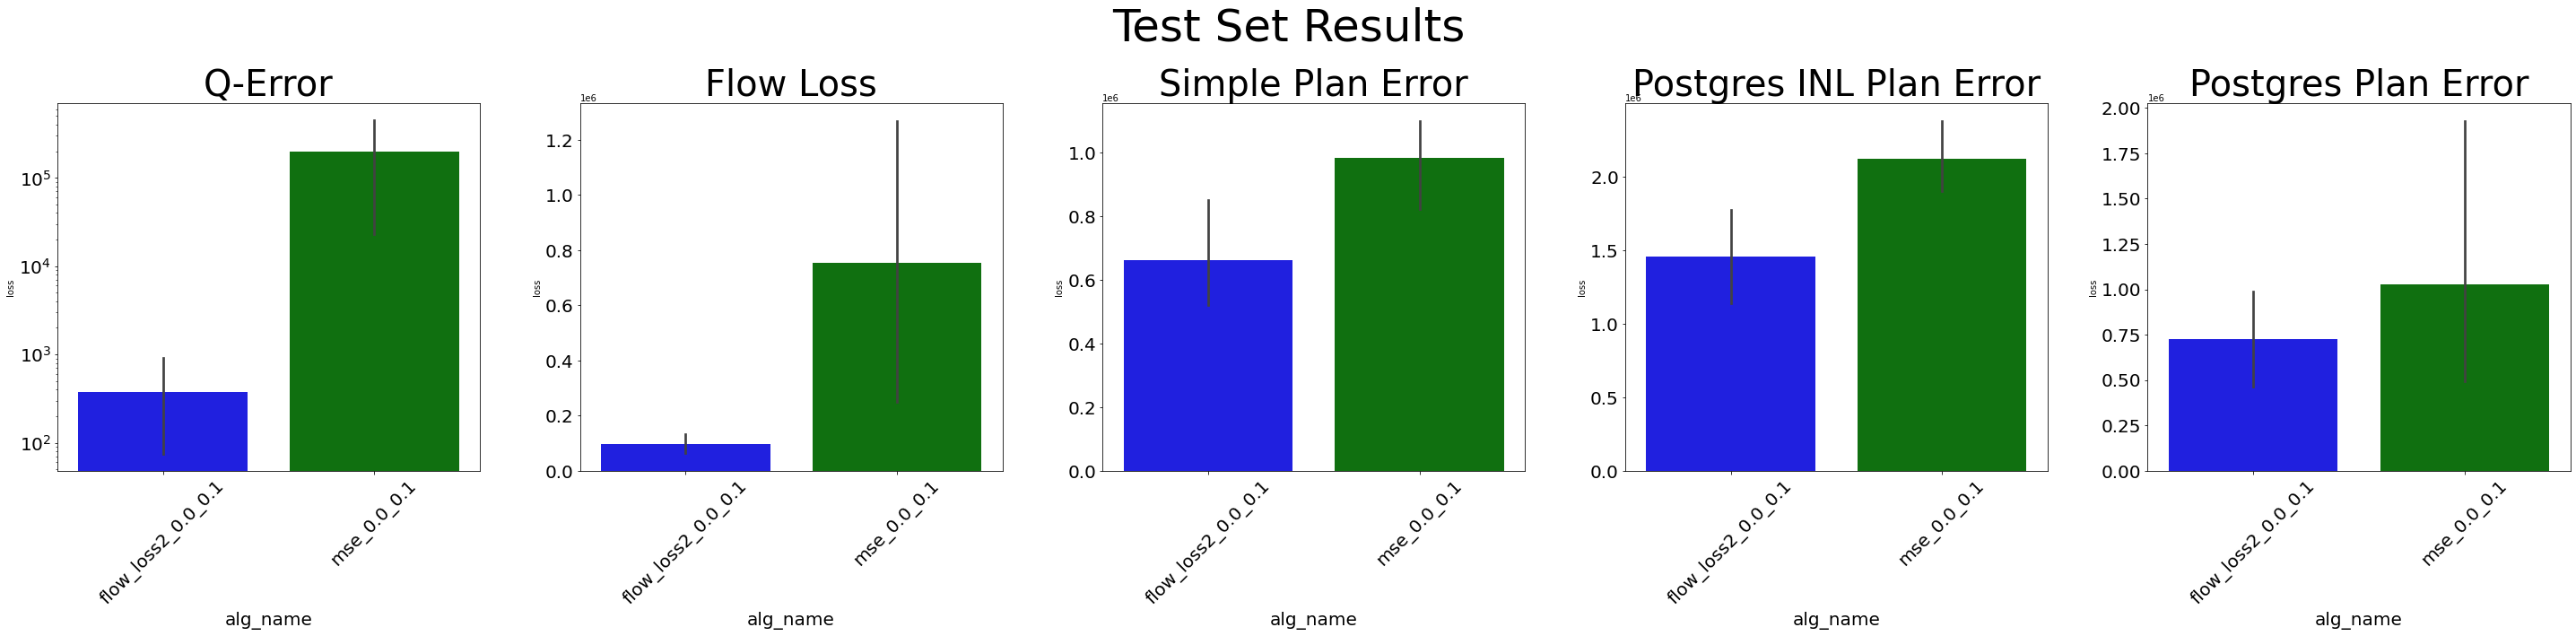

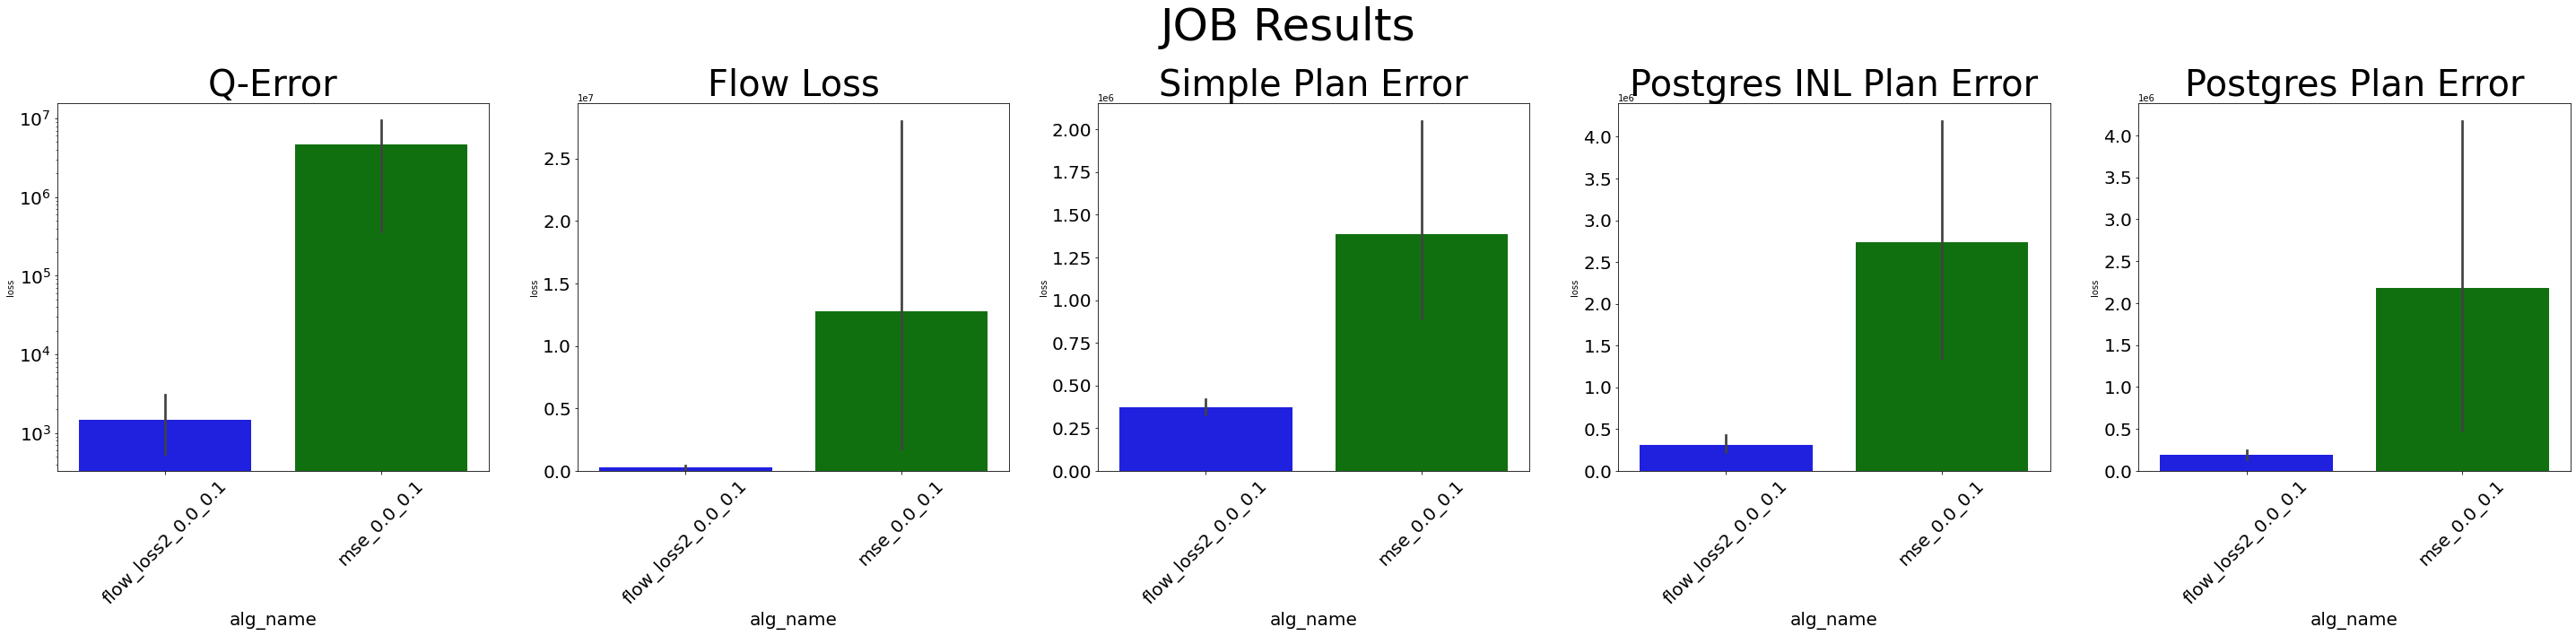

In [14]:
construct_summary_final(df, "train", "Training Set Results", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER)
construct_summary_final(df, "test", "Test Set Results", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER)
construct_summary_final(df, "job", "JOB Results", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER)

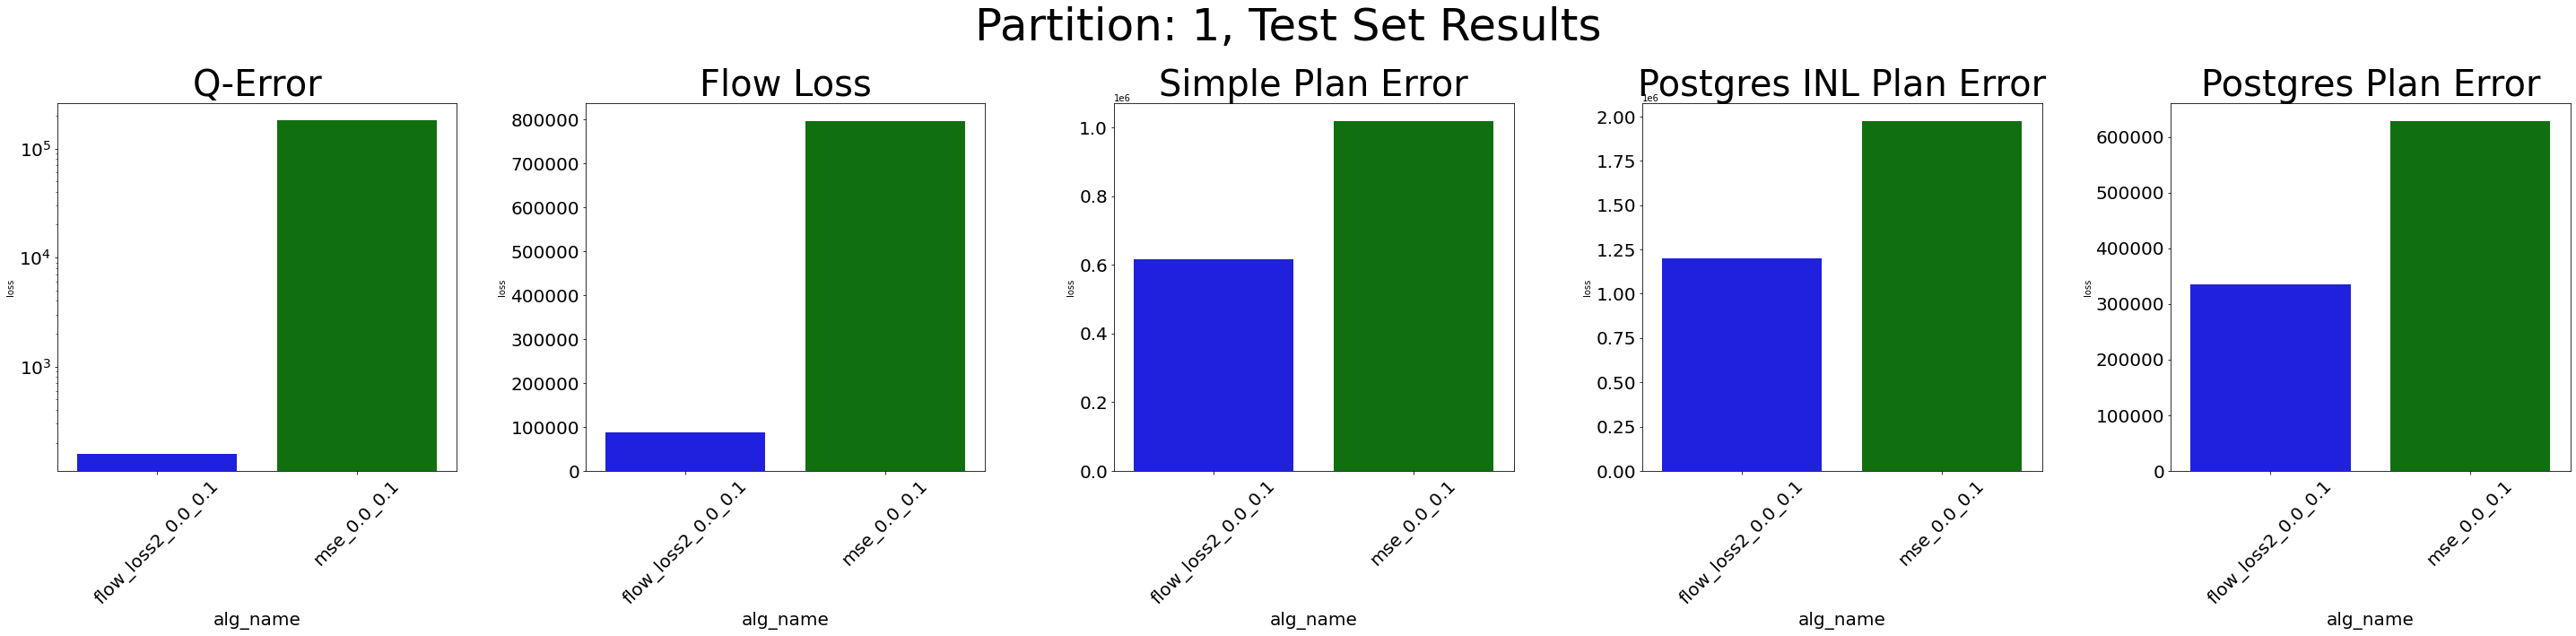

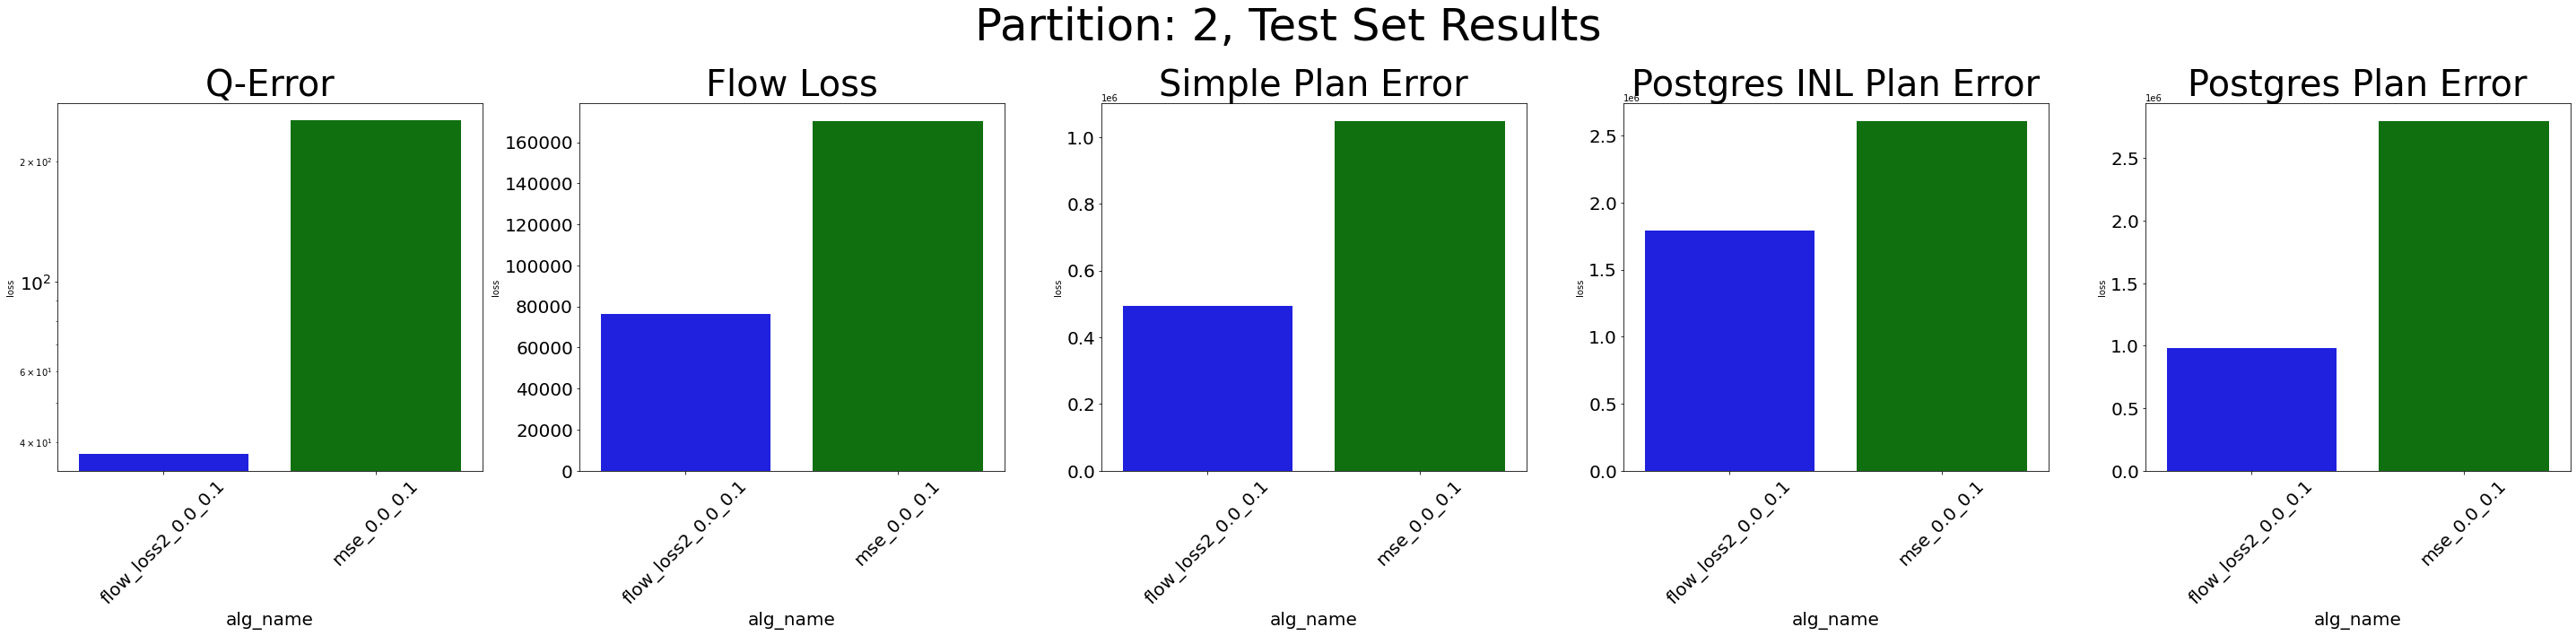

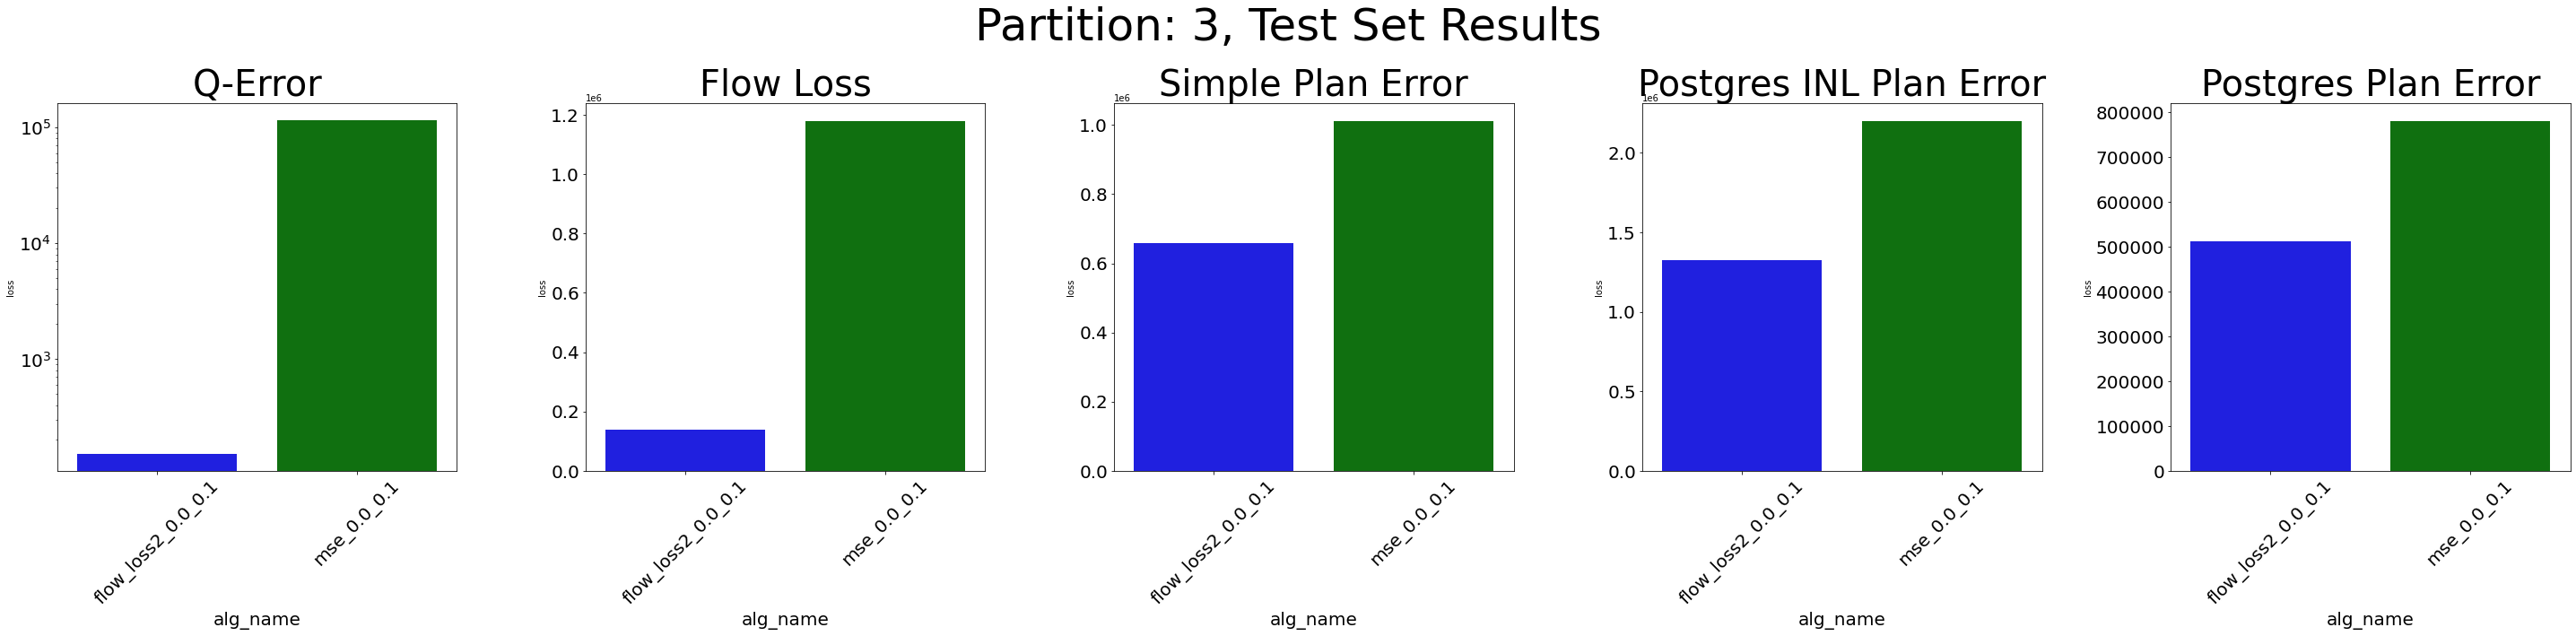

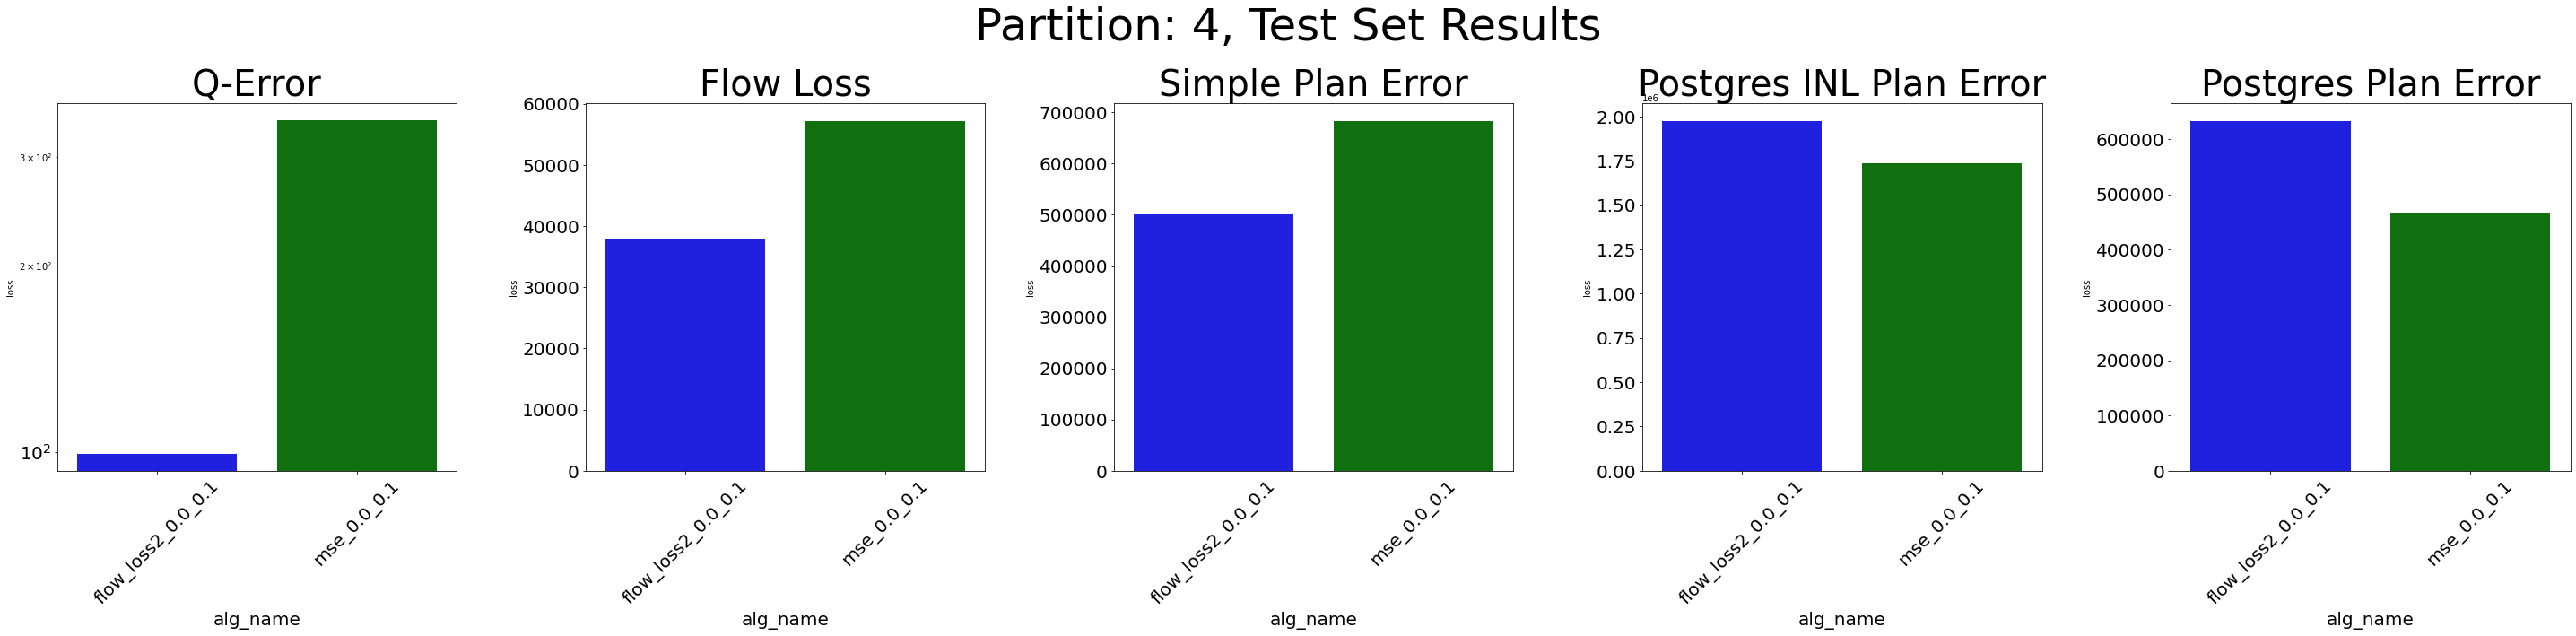

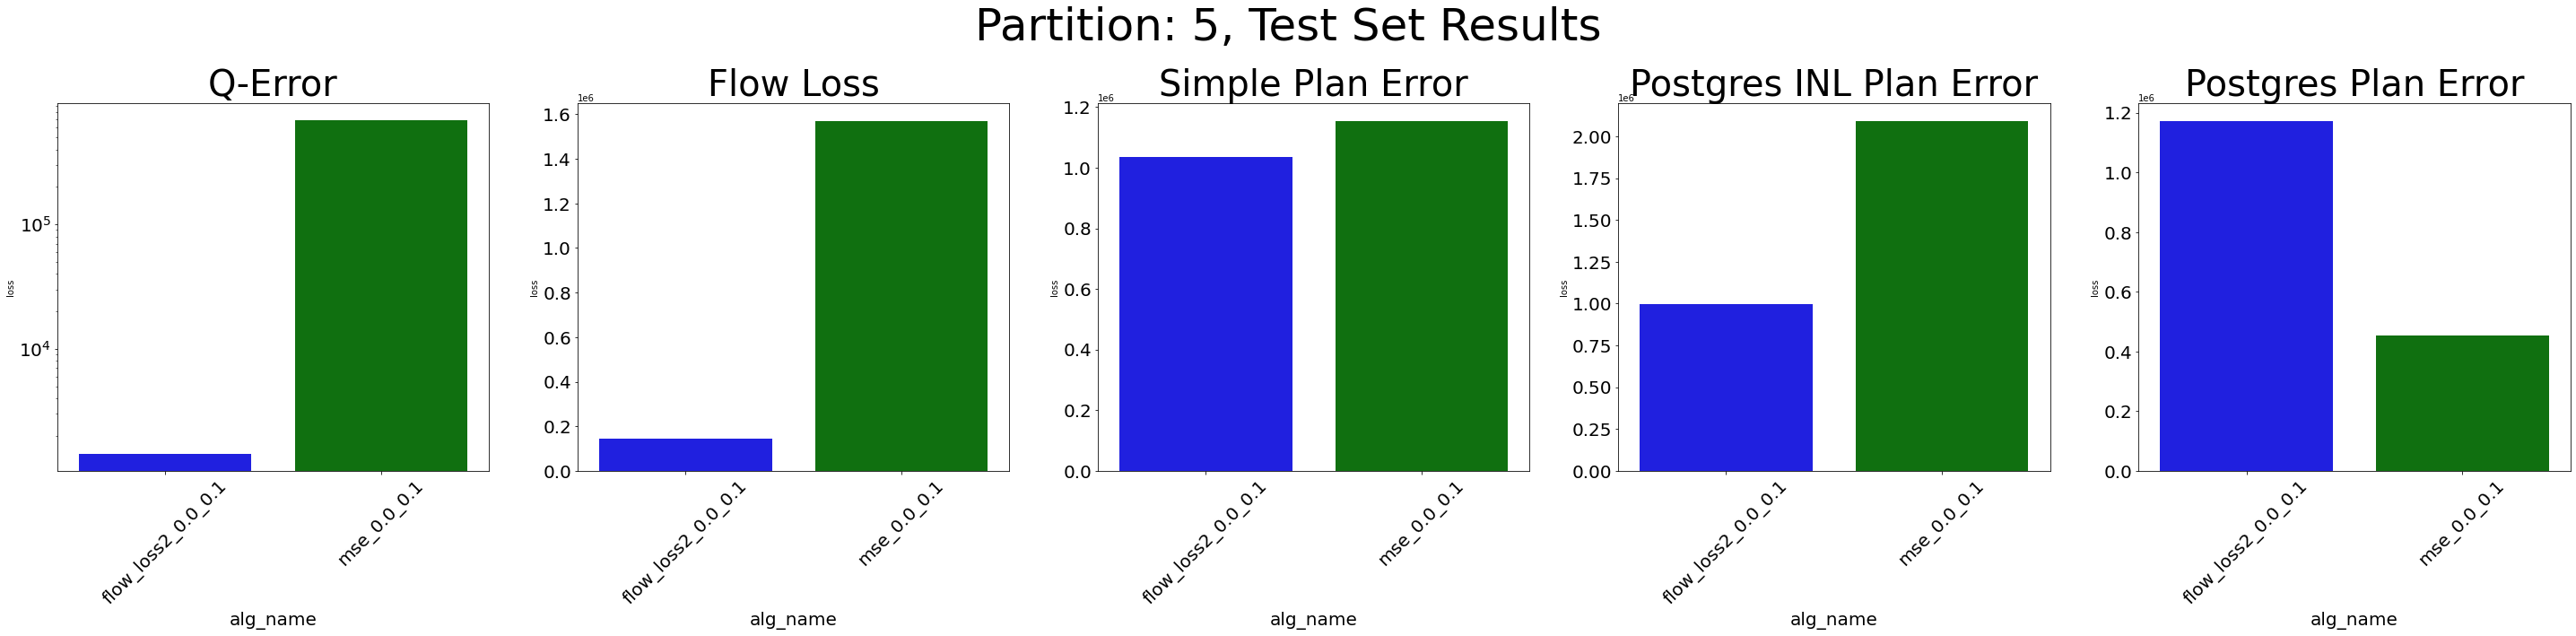

In [15]:
for part in set(df["partition"]):
    pdf = df[df["partition"] == part]
#     construct_summary_final(pdf, "train", "Parition: {}, Training Set Results".format(part), 
#                             ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER)
    construct_summary_final(pdf, "test", "Partition: {}, Test Set Results".format(part), ERRORS, HUE_COLORS=HUE_COLORS,
                           ORDER=ORDER)
#     construct_summary_final(pdf, "job", "Partition: {}, JOB Results".format(part), ERRORS, 
#                             HUE_COLORS=HUE_COLORS, ORDER=ORDER)

In [171]:
overlap_info = load_object(OVERLAP_INFO)

In [172]:
print(overlap_info)

    samples_type  seed         overlap_type  overlap_ratio
0           test     1           node_exact       0.499281
1           test     1           pred_exact       0.365269
2           test     1    node_overlap_mean       0.898284
3           test     1  node_overlap_median       1.000000
4           test     1    node_overlap_mean       0.821490
..           ...   ...                  ...            ...
289         test    50           pred_exact       0.682327
290         test    50    node_overlap_mean       0.896774
291         test    50  node_overlap_median       0.888889
292         test    50    node_overlap_mean       0.906022
293         test    50  node_overlap_median       1.000000

[294 rows x 4 columns]


In [173]:
def plot_overlap(df, odf, overlap_type):
    df = df[df.loss_type == "cm1_jerr"]
    df = df[df.samples_type == "test"]

    odf = odf[odf.overlap_type == overlap_type]
    ov = {}
    for part in set(df["partition"]):
        tmp = odf[odf.seed == part]
        #pdf = df[df["partition"] == part]
        if len(tmp) == 0:
            ov[part] = np.nan
            continue
        ov[part] = tmp.overlap_ratio.values[0]
    
    df["overlap_ratio"] = df.apply(lambda x: ov[x["partition"]], axis=1)
    df = df[~df.overlap_ratio.isna()]
    sns.scatterplot(data=df, x="overlap_ratio", y="loss", hue="alg_name")
    #plt.ylim(None,1e8)
    plt.yscale("log")
    plt.show()

node_overlap_mean


/usr/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


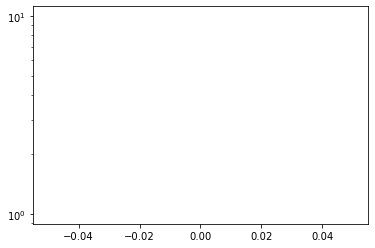

pred_exact


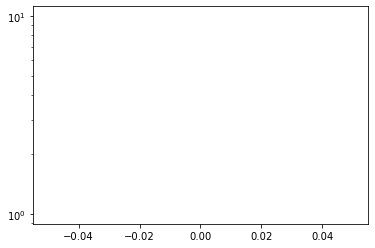

node_exact


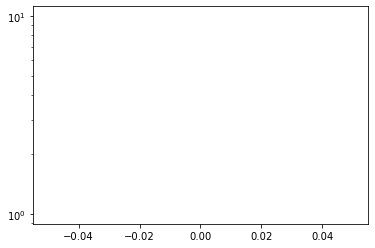

node_overlap_median


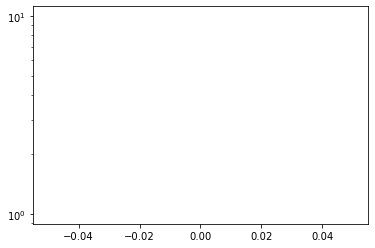

In [174]:
for ot in set(overlap_info["overlap_type"]):
    print(ot)
    plot_overlap(df, overlap_info, ot)

In [175]:
print(set(df["partition"]))

{'0'}


In [54]:
df.groupby(["alg_name", "loss_type", "samples_type"])["loss"].describe()

count  \
alg_name                                         loss_type samples_type          
xgboost_nested_loop_index7-XGBoost-0.0--D0.1-170 cm1_jerr  job             1.0   
                                                           test            1.0   
                                                           train           1.0   
                                                 flow_err  job             1.0   
                                                           test            1.0   
                                                           train           1.0   
                                                 jerr      job             1.0   
                                                           test            1.0   
                                                           train           1.0   
                                                 plan_err  job             1.0   
                                                           test            1.0   
                                                           train           1.0   
                                                 qerr      job             1.0   
                                                           test            1.0   
                                                           train           1.0   
xgboost_nested_loop_index7-XGBoost-0.0--D0.1-849 cm1_jerr  train           1.0   
                                                 flow_err  train           1.0   
                                                 jerr      train           1.0   
                                                 plan_err  train           1.0   
                                                 qerr      train           1.0   

                                                                                 mean  \
alg_name                                         loss_type samples_type                 
xgboost_nested_loop_index7-XGBoost-0.0--D0.1-170 cm1_jerr  job           1.629687e+05   
                                                           test          2.290113e+06   
                                                           train         1.449797e+06   
                                                 flow_err  job           2.699195e+05   
                                                           test          3.881870e+04   
                                                           train         4.001888e+04   
                                                 jerr      job           1.216725e+05   
                                                           test          5.582964e+05   
                                                           train         5.676002e+05   
                                                 plan_err  job           2.801705e+05   
                                                           test          2.643786e+05   
                                                           train         3.088757e+05   
                                                 qerr      job           4.770957e+02   
                                                           test          9.891787e+00   
                                                           train         4.715040e+00   
xgboost_nested_loop_index7-XGBoost-0.0--D0.1-849 cm1_jerr  train         2.312436e+06   
                                                 flow_err  train         6.884798e+04   
                                                 jerr      train         1.160490e+06   
                                                 plan_err  train         4.295901e+05   
                                                 qerr      train         9.229896e+00   

                                                                         std  \
alg_name                                         loss_type samples_type        
xgboost_nested_loop_index7-XGBoost-0.0--D0.1-170 cm1_jerr  job           NaN   
                                                           test      

In [68]:
qerrs["loss"] = abs(qerrs["loss"])

In [69]:
qerrs.keys()

Index(['loss', 'samples_type', 'alg', 'sample_bitmap', 'hidden_layer_size',
       'flow_features', 'nn_type', 'alg_name', 'partition'],
      dtype='object')

In [70]:
qerrs.groupby(["alg_name", "nn_type", "samples_type"])["loss"].describe()

count          mean           std  \
alg_name   nn_type   samples_type                                          
flow_loss2 microsoft job            142768.0  1.838093e+07  1.368794e+09   
                     test          3409352.0  8.682056e+03  2.219597e+06   
                     train         3398614.0  8.304472e+03  1.832733e+06   
           mscn      job             71384.0  9.106183e+02  1.116233e+04   
                     test          1704676.0  4.383155e+01  1.032393e+03   
                     train         1699307.0  3.821081e+01  9.474119e+02   
mse        microsoft job            142768.0  3.793840e+06  5.571972e+08   
                     test          3409352.0  1.651965e+01  3.316512e+03   
                     train         3398614.0  4.254784e+00  1.554846e+02   
           mscn      job            214018.0  6.956334e+06  6.073844e+08   
                     test          5112924.0  1.843273e+01  6.778774e+02   
                     train         5097921.0  2.484912e+00  3.108217e+01   

                                        min        25%         50%  \
alg_name   nn_type   samples_type                                    
flow_loss2 microsoft job           1.000000  25.357337  167.242636   
                     test          1.000000  20.634787   86.452087   
                     train         1.000000  20.714706   85.759182   
           mscn      job           1.000025   2.722776    9.470565   
                     test          1.000000   1.505473    2.410920   
                     train         1.000000   1.482929    2.329170   
mse        microsoft job           1.000019   3.758051   17.231385   
                     test          1.000000   1.262222    1.760466   
                     train         1.000000   1.212371    1.556833   
           mscn      job           1.000002   7.952129  114.439603   
                     test          1.000000   1.236481    1.725892   
                     train         1.000000   1.167041    1.437213   

                                           75%           max  
alg_name   nn_type   samples_type                             
flow_loss2 microsoft job           1486.641545  1.499814e+11  
                     test           325.911790  1.766368e+09  
                     train          317.522088  7.871284e+08  
           mscn      job             67.708375  1.175197e+06  
                     test             5.545813  4.560122e+05  
                     train            5.113253  5.019900e+05  
mse        microsoft job            149.636293  1.461197e+11  
                     test             3.211639  5.990384e+06  
                     train            2.381371  9.234376e+04  
           mscn      job           4475.732904  1.471100e+11  
                     test             3.225271  4.283738e+05  
                     train            2.022416  1.158321e+04

In [71]:
print(set(df["hidden_layer_size"]))

{512}
